In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve

# import warnings
# warnings.filterwarnings('ignore')

### Frame the problem:
"describe the dataset, the purpose and aim of the project"

### Data loading, descriptive stats, percentage split of each column so we can verify after splitting
"add comments for every aspect here"

In [13]:
# read the csv file
df = pd.read_csv('churn.csv')
# check the na values
print('=isnull==========================================================')
print(df.isnull().sum())
# check the duplicate values
print('=duplicated======================================================')
print(df.duplicated().sum())
# check the unique values
print('=nunique=========================================================')
print(df.nunique())
# check the data types
print('=dtypes=========================================================')
print(df.dtypes)
# check the data shape
print('=if it is unbalance==============================================')
print("not Exited 0 : ",df[df['Exited']==0].shape)
print("Exited 1 : ",df[df['Exited']==1].shape)
# check the overall data 
df

=isnull==========================================================
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
=duplicated======================================================
0
=nunique=========================================================
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
=dtypes=========================================================
RowNumber            int64
CustomerId           int64
Surname    

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Preprocessing - train/test split
"It may sound strange to voluntarily set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias."

In [21]:
# here need to change to George's code to evenly distribute the 0 an 1
y = df['Exited'] # 1 in the case of Exited; 0 not Exited
X = df.drop(columns='Exited')

# split training, validation and test sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, train_size=0.75, random_state=461)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_val, Y_train_val, train_size = 0.8, random_state=461)
print(X_train.shape, X_valid.shape , X_test.shape)

numeric_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_valid[numeric_columns] = scaler.transform(X_valid[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

(6000, 11) (1500, 11) (2500, 11)


### Exploration and Descpritive study of training set (inc. viz)

correlations, scatterplots, histograms, all of Tim's stuff, some of George's stuff

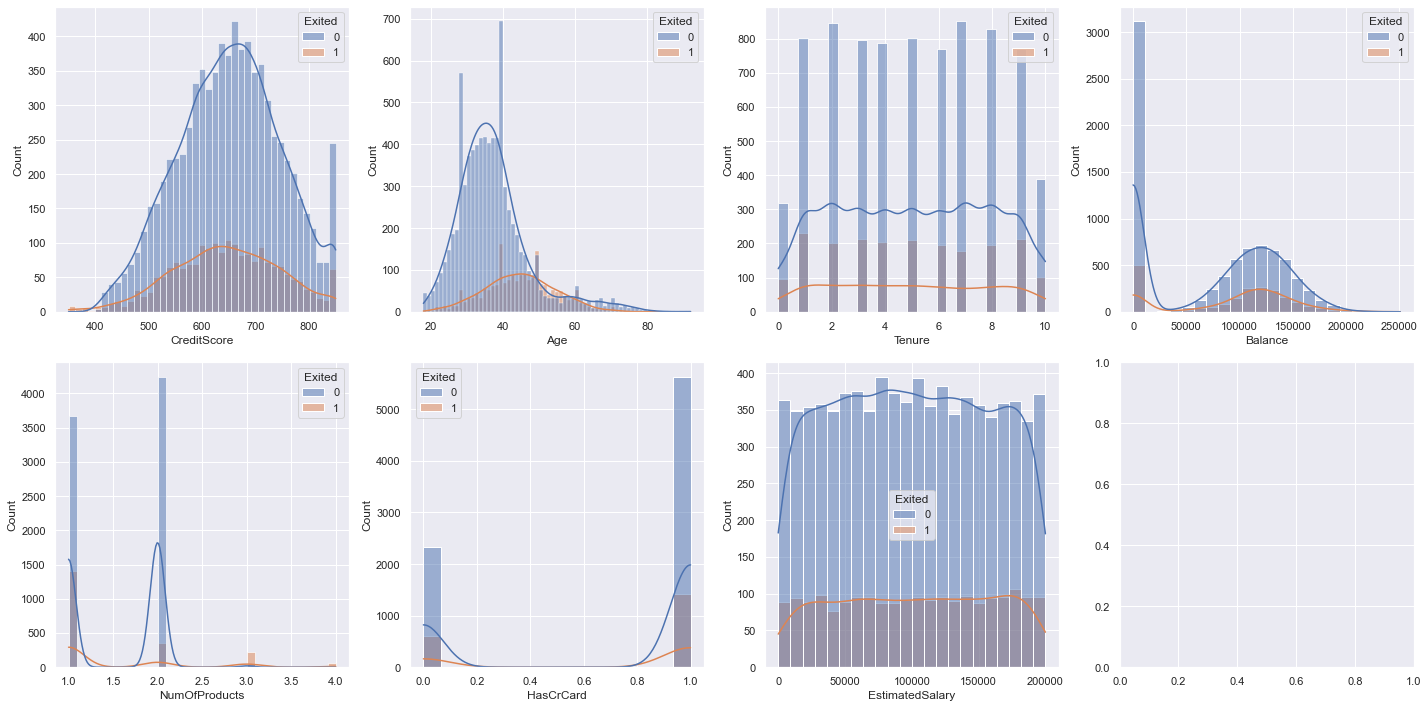

<Figure size 576x288 with 0 Axes>

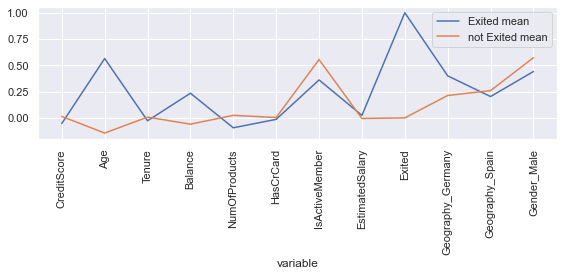

In [15]:
# the preprocessing definiation function (just foor viz)
def preprocesssing(df):    
    # Drop the Surname, RowNumber, and CustomerId columns (no duplicates, all unique)
    df.drop(columns=['Surname'],inplace=True)
    df.drop(columns=['RowNumber'],inplace=True)
    df.drop(columns=['CustomerId'],inplace=True)
    #Make dummies from categroical variales
    categorical_cols = [
        'Geography', 'Gender'
    ]
    df = pd.get_dummies(df,
                        columns=categorical_cols,
                        dummy_na=False, # there's no nan in the df
                        drop_first=True)
    return df

df = preprocesssing(df)

# plotting the variable of 1 and 0 of distribution (after pre-processing)
numeric_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'
]
df_plot = df.copy()

# see all the features differences of 0 and 1 with the mean (after preprocessing)
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(numeric_columns):
    if i < 4:
        sns.histplot(df_plot, x=f"{col}", hue = "Exited", kde=True, color="skyblue", ax=axs[0, i])
    else:
        sns.histplot(df_plot, x=f"{col}", hue = "Exited", kde=True, color="skyblue", ax=axs[1, i-4])
plt.figure()


# Note rthat we take a look at the scalar data (but not really apply the scalar here, we should apply after the split
scaler = StandardScaler()
df_plot[numeric_columns] = scaler.fit_transform(df_plot[numeric_columns])
# Plot out to see the mean of the data
df_Exited_describe  = df_plot[df_plot['Exited']==1].describe()
df_not_Exited_describe  = df_plot[df_plot['Exited']==0].describe()
df_Exited_mean = df_Exited_describe.iloc[1:2]
df_not_Exited_mean = df_not_Exited_describe.iloc[1:2]
df_Exited_mean_transposed = df_Exited_mean.T 
df_not_Exite_mean_transposed = df_not_Exited_mean.T 

df_Exited_mean_transposed['variable'] = df_Exited_mean_transposed.index
df_not_Exite_mean_transposed['variable'] = df_not_Exite_mean_transposed.index
df_Exited_mean_transposed = df_Exited_mean_transposed.rename(columns={'mean': 'Exited mean'}, index={'variable': 'variable'})
df_not_Exite_mean_transposed = df_not_Exite_mean_transposed.rename(columns={'mean': 'not Exited mean'}, index={'variable': 'variable'})

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

ax = df_Exited_mean_transposed.plot(x='variable', y='Exited mean')
df_not_Exite_mean_transposed.plot(ax=ax, x='variable', y='not Exited mean')

plt.xticks(range(len(df_Exited_mean_transposed['variable'])),list(df_not_Exite_mean_transposed['variable']),rotation=90)
plt.show()

### Data Cleaning
proving there is nothing to clean - just for the sake of including and evidencing.

### Dealing with categorical data

In [18]:
# here 's overlapping with the above
# the preprocessing definiation function
def preprocesssing(df):    
    # Drop the Surname, RowNumber, and CustomerId columns (no duplicates, all unique)
    df.drop(columns=['Surname'],inplace=True)
    df.drop(columns=['RowNumber'],inplace=True)
    df.drop(columns=['CustomerId'],inplace=True)
    #Make dummies from categroical variales
    categorical_cols = [
        'Geography', 'Gender', 'IsActiveMember'
    ]
    df = pd.get_dummies(df,
                        columns=categorical_cols,
                        dummy_na=False, # there's no nan in the df
                        drop_first=False)
    return df

### Feature engineering - try and do different things here (??Maybe do this after baseline models??)

### Feature Scaling


(defining a function to combine scaling, engineering, and categorcial dealing and to apply to the test set)

### Naive Model
Predict the majority class for each observation (George)

### Baseline Model
Logistic Regression (Tim) 

In [25]:
# Train logistic model on the training set
logm_train = LogisticRegression(max_iter=2000).fit(X_train,Y_train.values.ravel()) 
print("Intercept = ",logm_train.intercept_)
print("Model coefficients = ", logm_train.coef_)
print("R^2 =",logm_train.score(X_train, Y_train))

Intercept =  [-0.94419737]
Model coefficients =  [[-0.05681862  0.75846288 -0.04194448  0.17679827 -0.06010856 -0.02669948
  -1.0873731   0.01935175  0.72052519 -0.0564429  -0.5105237 ]]
R^2 = 0.8053333333333333


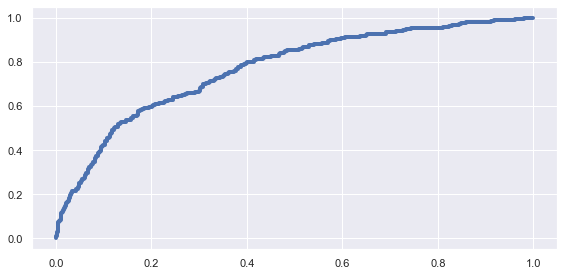

roc_auc_score 0.7689095813472269
Threshold =  0.2692362594654099


In [26]:
# Use validation set to pick right threshold
# fit the validation data to the trian model
Y_probs =logm_train.predict_proba(X_valid)[:,1]
# get the fpr tpr score
fpr, tpr, thresholds = metrics.roc_curve(Y_valid,Y_probs)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
#check the ROC score
print('roc_auc_score',roc_auc_score(Y_valid,Y_probs))
# get the threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print("Threshold = ",threshold)

In [27]:
# Retraining the final model with training+validation
train_val_X = pd.concat([X_train, X_valid])
train_val_Y = pd.concat([Y_train, Y_valid])

logm = LogisticRegression(max_iter=2000).fit(train_val_X, train_val_Y.values.ravel())
print("Intercept = ",logm.intercept_)
print("Model coefficients = ", logm.coef_)
print("R^2 =",logm.score(train_val_X, train_val_Y))

Intercept =  [-0.97376427]
Model coefficients =  [[-0.0638014   0.75197759 -0.05863349  0.17240997 -0.055623   -0.03144985
  -1.10769285  0.02678531  0.73658147 -0.02069206 -0.49716818]]
R^2 = 0.8090666666666667


Accuracy =  0.7572
[[1613  394]
 [ 213  280]]


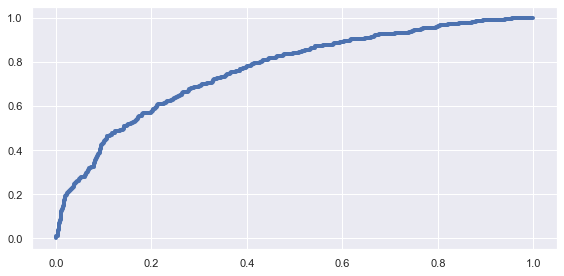

0.7642126795566431

In [28]:
# Test the accuracy of training + validation logistic model on the testing set
# test dataset to check accuracy_score
Y_probs_test =logm.predict_proba(X_test)[:,1]
Y_pred_test = np.where(Y_probs_test > threshold, 1, 0) #imput the threshold
cm = confusion_matrix(Y_test,Y_pred_test)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("Accuracy = ",(TP+TN)/(TP+TN+FP+FN)) # or metrics.accuracy_score(Y_test,Y_pred_test)
print(cm)

# get the fpr tpr score
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_probs_test)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
#check the ROC score
roc_auc_score(Y_test,Y_probs_test)

### Classifiers: SVM, DT, RF, kNN, Gradient Boosting Classifier

SVM: Tim\
RF: Siyuan\
DT: Agam\
kNN: Tiana\
Gradient Boosting Classifier: George

##### Cross-Validation: Everyone does it for their own models

##### Recording Final Accuracies of Classifiers: 

### Deep Learning

##### Basic FF NN (Tim)

In [19]:
# clean sessions and set seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [22]:
# create tensorflow model
model_benchmarking = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(100, kernel_initializer = 'uniform',activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, kernel_initializer = 'uniform',activation="relu"),
    tf.keras.layers.Dense(1, kernel_initializer = 'uniform', activation="sigmoid")
    ])

# early_stopping
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# compile the model
model_benchmarking.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              metrics=["accuracy"])
# keep track of the perforance
log = model_benchmarking.fit(X_train, Y_train, 
                epochs=200, 
                validation_data=(X_valid, Y_valid),
               )

print("MSE on test set: " + str(model_benchmarking.evaluate(X_test, Y_test)))


Epoch 1/200
188/188 [==============================] - 0s 1ms/step - loss: 0.6313 - accuracy: 0.7898 - val_loss: 0.5789 - val_accuracy: 0.8060
Epoch 2/200
188/188 [==============================] - 0s 855us/step - loss: 0.5612 - accuracy: 0.7912 - val_loss: 0.5316 - val_accuracy: 0.8060
Epoch 3/200
188/188 [==============================] - 0s 785us/step - loss: 0.5322 - accuracy: 0.7912 - val_loss: 0.5102 - val_accuracy: 0.8060
Epoch 4/200
188/188 [==============================] - 0s 799us/step - loss: 0.5195 - accuracy: 0.7912 - val_loss: 0.5000 - val_accuracy: 0.8060
Epoch 5/200
188/188 [==============================] - 0s 771us/step - loss: 0.5137 - accuracy: 0.7912 - val_loss: 0.4947 - val_accuracy: 0.8060
Epoch 6/200
188/188 [==============================] - 0s 774us/step - loss: 0.5107 - accuracy: 0.7912 - val_loss: 0.4917 - val_accuracy: 0.8060
Epoch 7/200
188/188 [==============================] - 0s 815us/step - loss: 0.5088 - accuracy: 0.7912 - val_loss: 0.4895 - val_accu

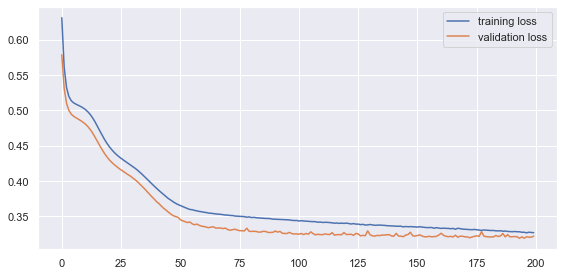

In [23]:
# visualise the lost 
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

In [24]:
# evalute the model on test set
model_benchmarking.evaluate(X_test, Y_test)

79/79 [==============================] - 0s 510us/step - loss: 0.3299 - accuracy: 0.8668


[0.32993894815444946, 0.8668000102043152]

##### Hyperparameter and layer size tuning - Keras Tuner

##### ??? Bias and Variance checking - Use different tools such as batch normalisation ???

##### Accuracy comparison of NNs - choosing final NN

## kNN model (Tiana)

In [139]:
#Default KNN model without any tuning - base metric
#k = 5
from sklearn.neighbors import KNeighborsClassifier

KNN_model_default = KNeighborsClassifier()
KNN_model_default.fit(X_train, Y_train)
y_pred =KNN_model_default.predict(X_train_val)
test_accuracy=accuracy_score(Y_train_val,y_pred)*100
print("Accuracy for our validation dataset without tuning is : {:.2f}%".format(test_accuracy) )


Accuracy for our validation dataset without tuning is : 86.85%


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      5972
           1       0.77      0.50      0.61      1528

    accuracy                           0.87      7500
   macro avg       0.83      0.73      0.76      7500
weighted avg       0.86      0.87      0.86      7500



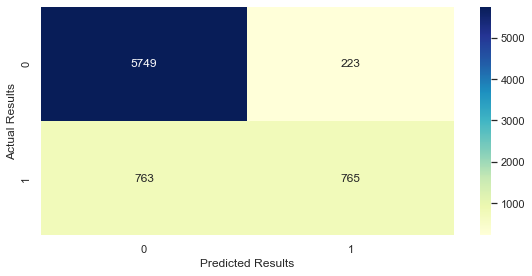

In [148]:
cm = confusion_matrix(Y_train_val,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

    # Visualizing the Confusion Matrix
fig1 = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='d')
plt.ylabel('Actual Results')
plt.xlabel('Predicted Results')
ax1.xaxis.set_label_position("top")

print(classification_report(Y_train_val,y_pred))

In [134]:
# Optimized kNN model

# With 10-fold CV to find optimal K.
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [135]:
#optimal k
print(grid_search.best_params_)

{'n_neighbors': 6}


In [136]:
# training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 83.98%


In [137]:
# kNN with k=15
from sklearn.metrics import plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors= 6)

knn.fit(X_train, Y_train)

y_pred=knn.predict(X_train_val) 

test_accuracy=accuracy_score(Y_train_val,y_pred)*100

print("Accuracy for our validation dataset with tuning is: {:.2f}%".format(test_accuracy))


Accuracy for our validation dataset with tuning is: 86.05%




              precision    recall  f1-score   support

           0       0.86      0.98      0.92      5972
           1       0.86      0.38      0.53      1528

    accuracy                           0.86      7500
   macro avg       0.86      0.68      0.72      7500
weighted avg       0.86      0.86      0.84      7500



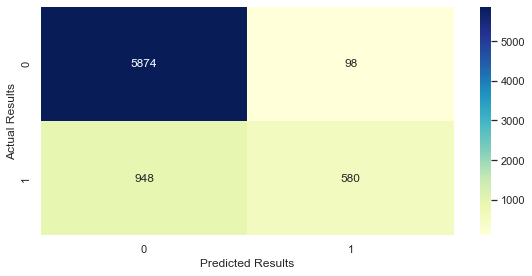

In [138]:
cm = confusion_matrix(Y_train_val,y_pred)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

    # Visualizing the Confusion Matrix
fig1 = plt.figure()
ax1 = fig.add_subplot(1,1,1)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='d')
plt.ylabel('Actual Results')
plt.xlabel('Predicted Results')
ax1.xaxis.set_label_position("top")

print('\n')
print(classification_report(Y_train_val,y_pred))

# More accurate TP predictions for class 1 by the adjusted kNN model compared to the default kNN model
## as precision is higher.

### Accuracies: Classifers vs NN 